# スタックとキュー

スタックとキューは `python` の場合，`List` もしくは `collections.deque` で実現できるので，とりあえずそっちを使います．
前回自分で作ったものを適用しても良いが，長いものに巻かれてやるのも一つの方法なので．
方針としては，`python` の場合，`List` は標準でついてくる（これは線形リスト(`LinkedList`) ぽい）．
`Doubly Linked List` 自身は `collections` のなかの `double ended queue (deque)` というやつなので，これを使う．
なお `deq` （キューから取り出す一般的な名前，`enq`/`deq` と表記される）と `deque` は混同しやすいので注意．（ぼくだけか）

In [1]:
from collections import deque
import timeit

## スタックに関して

本体を ADT として定義（基本 `push()` と `pop()` を用意すれば良い）

In [2]:
# ここが本体
# とりあえず，スタックの ADT として， push と pop を定義する

def push(stack, x):
    # stack はリストであることを仮定
    stack.append(x) # 末尾に追加するので append でよい
    
def pop(stack):
    # stack はリストであることを仮定
    return stack.pop() # 末尾を取り出すので pop() でよい

# ここからは，計測用の関数

def push_trial(size, stack):
    for i in range(10**size): # サイズは10のべきで測る
        push(stack, i)
        
def pop_trial(size, stack):
    for i in range(10**size):
        pop(stack)
    

# list と deque で時間計測
stack_with_list = []
stack_with_deque = deque([])
    
time_push_list = timeit.timeit(lambda: push_trial(5, stack_with_list), number=10)
time_push_deque = timeit.timeit(lambda: push_trial(5, stack_with_deque), number=10)
time_pop_list = timeit.timeit(lambda: pop_trial(5, stack_with_list), number=10)
time_pop_deque = timeit.timeit(lambda: pop_trial(5, stack_with_deque), number=10)

print(time_push_list, time_push_deque)
print(time_pop_list, time_pop_deque)

0.03121741599170491 0.02894295798614621
0.030912417045328766 0.0574555000057444


In [3]:
# じゃあ，あとはデータとって時間計測の結果をグラフにしてみる

import pandas as pd

data_list = []
for size in range(1, 6):
    time_push_list = timeit.timeit(lambda: push_trial(size, stack_with_list), number=10)
    time_push_deque = timeit.timeit(lambda: push_trial(size, stack_with_deque), number=10)
    time_pop_list = timeit.timeit(lambda: pop_trial(size, stack_with_list), number=10)
    time_pop_deque = timeit.timeit(lambda: pop_trial(size, stack_with_deque), number=10)
    data_list.append({'size': size, 
               'push_list': time_push_list, 
               'pop_list': time_pop_list, 
               'push_deque': time_push_deque, 
               'pop_deque': time_pop_deque})

df = pd.DataFrame(data_list)

df.head()


,size,push_list,pop_list,push_deque,pop_deque
0,1,0.000007,0.000006,0.000008,0.000005
1,2,0.000026,0.000024,0.000025,0.000023
2,3,0.000254,0.000256,0.000265,0.000257
3,4,0.002816,0.002821,0.002706,0.002721
4,5,0.029438,0.029262,0.030757,0.029177


Matplotlib is building the font cache; this may take a moment.


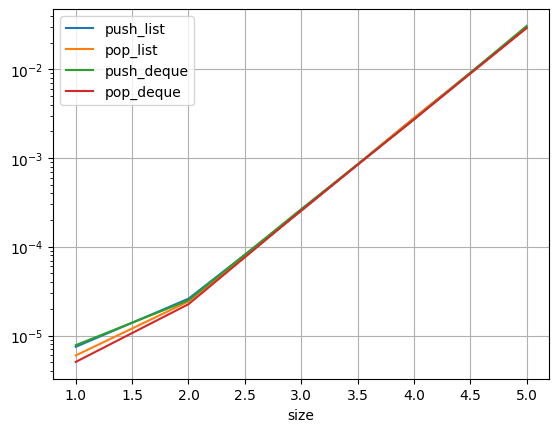

In [5]:
import matplotlib.pylab as plt

df.plot(x='size', y=['push_list', 'pop_list', 'push_deque', 'pop_deque'], logy=True)
plt.grid()

## キューに関して

本体を ADT として定義（基本 `enq()` と `deq()` を用意すれば良い）

In [6]:
# ここが本体
# とりあえず，キューの ADT として， enq() と deq() を定義する

# ただし `list` と， `collections.deque` で取り出し方が違う．
def enq(queue, x):
    # queue は，リストもしくは collections.deque であることを仮定
    queue.append(x)
    
def deq_list(queue):
    # list から取り出す場合
    return queue.pop(0) # 先頭を取り出す場合，pop(0) で

def deq_deque(queue):
    # collections.deque から取り出す場合
    return queue.popleft() # 先頭を取り出す場合 popleft() で


# ここからは，計測用の関数

def enq_trial(size, queue):
    for i in range(10**size): # サイズは10のべきで測る
        enq(queue, i)
        
def deq_list_trial(size, queue):
    for i in range(10**size):
        deq_list(queue)
    
def deq_deque_trial(size, queue):
    for i in range(10**size):
        deq_deque(queue)


# list と deque で時間計測
queue_with_list = [] # リストでキューを実装
queue_with_deque = deque([]) # collections.deque でキューを実装
    
time_enq_list = timeit.timeit(lambda: enq_trial(5, queue_with_list), number=10)
time_enq_deque = timeit.timeit(lambda: enq_trial(5, queue_with_deque), number=10)
time_deq_list = timeit.timeit(lambda: deq_list_trial(5, queue_with_list), number=10)
time_deq_deque = timeit.timeit(lambda: deq_deque_trial(5, queue_with_deque), number=10)
print(time_enq_list, time_enq_deque)
print(time_deq_list, time_deq_deque)

0.03118449996691197 0.028555417025927454
65.58872362499824 0.03614216600544751


うん，`list` 使ったキューはやばそう．
グラフにしてみよう

In [7]:
import pandas as pd

data_list = []
for size in range(1, 6):
    time_enq_list = timeit.timeit(lambda: enq_trial(size, queue_with_list), number=10)
    time_enq_deque = timeit.timeit(lambda: enq_trial(size, queue_with_deque), number=10)
    time_deq_list = timeit.timeit(lambda: deq_list_trial(size, queue_with_list), number=10)
    time_deq_deque = timeit.timeit(lambda: deq_deque_trial(size, queue_with_deque), number=10)
    data_list.append({'size': size, 
               'enq_list': time_enq_list, 
               'deq_list': time_deq_list, 
               'enq_deque': time_enq_deque, 
               'deq_deque': time_deq_deque})

df = pd.DataFrame(data_list)

df.head()


,size,enq_list,deq_list,enq_deque,deq_deque
0,1,0.000007,0.000006,0.000005,0.000004
1,2,0.000025,0.000067,0.000025,0.000022
2,3,0.000238,0.013752,0.000252,0.000431
3,4,0.006186,0.670297,0.008164,0.003267
4,5,0.031629,65.364188,0.027759,0.029956


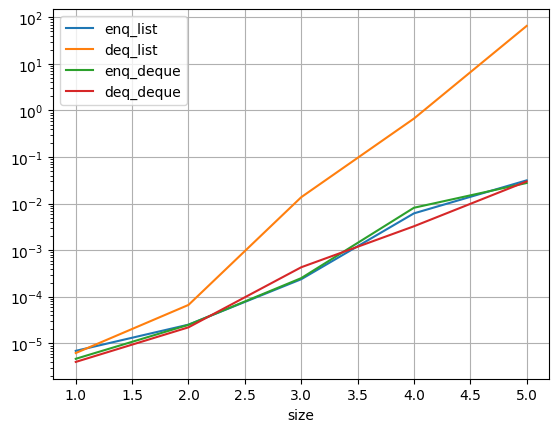

In [8]:
import matplotlib.pylab as plt

df.plot(x='size', y=['enq_list', 'deq_list', 'enq_deque', 'deq_deque'], logy=True)
plt.grid()

`i == 5` で，縦軸で 3 くらい違うので，おおよそ 10^3 = 1000倍近い差が `deq_list()` で出ている．
ということで，キューを使う場合は `list` で実装してはあかんということになるかな．